## Simulating a Match

In [1]:
import numpy as np
import numpy.random as rand
import time
import pylab as plt

In [2]:
#Length of match
minutes = 90
#Average goals per match
goals_per_match = 2.79 # goles de media por partido
#Probability of a goal per minute
prob_per_minute = np.array(goals_per_match/minutes)
print('The probability of a goal per minute is %5.5f' % prob_per_minute )

The probability of a goal per minute is 0.03100


Simulamos una serie de 10 partidos, de cara a obtener la cantidad de goles en cada uno.

In [3]:
goals = 0


for n in range(10):
    print('-----------------------------------------------------')
    print('Partido {}'.format(n+1))
    goals_game = 0
    for minute in range(minutes):
        prob = rand.rand(1)[0]
        if prob < prob_per_minute:
            print('x',end = ' ')
            goals_game+=1
            time.sleep(1)
        else:
            print('o',end = ' ')
            time.sleep(0.1)
    goals+=goals_game
    print('\n')
    print('Number of goals: {}'.format(goals_game))

-----------------------------------------------------
Partido 1
o o o o o o o o o o x o o o o o o o o o o o o o o o x o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o 

Number of goals: 2
-----------------------------------------------------
Partido 2
o o o o o o o o o o o o o o o o o o o o o o o o o x o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o x o o o o o o o x o o 

Number of goals: 3
-----------------------------------------------------
Partido 3
o x o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o 

Number of goals: 1
-----------------------------------------------------
Partido 4
o o o o o o o o x x o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o o x o o o o o o o o o o o o o o o o o o o o o o o o o o o o o

In [4]:
print('Goles por Partido: {}'.format(goals/10))

Goles por Partido: 3.2


Lo normal es que un partido tenga entre dos o tres goles. La mayoría de encuentros tienen hasta cinco goles.

Lo que haremos ahora es simular una temporada completa de fútbol (los 380 partidos que hay en una liga de 20). Computaremos el total de goles de cada partido y realizaremos un histograma con el nº de goles en cada partido.

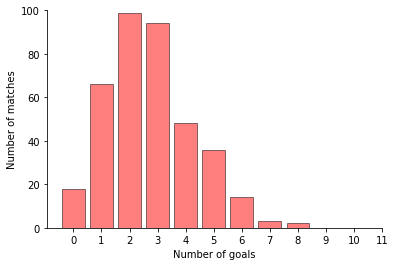

In [5]:
num_matches = 380
def simulateMatch(n, p):
  # n - number of time units
  # p - probability per time unit of a goal
  # display_match == True then display simulation output for match.

  # Count the number of goals
    goals = 0

    for minute in range(n):
      # Generate a random number between 0 and 1.
        r = rand.rand(1)[0]
      # Prints an X when there is a goal and a zero otherwise.
        if (r < p):
        # Goal - if the random number is less than the goal probability.
            goals = goals + 1

    return goals

goals = np.zeros(num_matches)
for i in range(num_matches):
    goals[i] = simulateMatch(minutes, prob_per_minute)
    
fig, ax = plt.subplots(num=1)
histogram_range = np.arange(-0.5, 11, 1)
histogram_goals = np.histogram(goals, histogram_range)

ax.bar(histogram_goals[1][:-1] + 0.5, histogram_goals[0], color='red', edgecolor='black', linestyle='-', alpha=0.5)
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(0, 12, step=1))
ax.set_yticks(np.arange(0, 101, step=20))
ax.set_xlabel('Number of goals')
ax.set_ylabel('Number of matches')
plt.show()

### Simulating Results

Emplearemos Regresión de Poisson para hacer un modelo basándonos en datos de la Premier League y aplicándolo a dos equipos de cara a simular el resultado de sus enfrentamientos

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam

In [7]:
pl = pd.read_csv("https://www.football-data.co.uk/mmz4281/2122/E0.csv")
pl.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86


In [8]:
pl.shape[0]

380

In [9]:
pl = pl[['HomeTeam','AwayTeam','FTHG','FTAG']]
pl = pl.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})

pl = pl[:-10]
pl.mean()

C:\Users\aleex\AppData\Local\Temp/ipykernel_8584/3146450205.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pl.mean()


HomeGoals    1.491892
AwayGoals    1.297297
dtype: float64

In [10]:
casa = pl[['HomeTeam','AwayTeam','HomeGoals']]
casa['home'] = 1
casa.rename({'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'},axis=1,inplace=True)

vis = pl[['AwayTeam','HomeTeam','AwayGoals']]
vis['home'] = 0
vis.rename({'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'},axis=1,inplace=True)

goal_model_data = pd.concat([casa,vis])
goal_model_data.head()

,team,opponent,goals,home
0,Brentford,Arsenal,2,1
1,Man United,Leeds,5,1
2,Burnley,Brighton,1,1
3,Chelsea,Crystal Palace,3,1
4,Everton,Southampton,3,1


In [11]:
goal_model_data.shape[0]

740

Elaboramos el modelo de poisson a partir de un dataframe que tiene, para cada partido, dos líneas, con el equipo, su rival, los goles y si era el local o el visitante. Nuestro modelo tratará de predecir el número de goles anotados a partir de las otras tres variables mencionadas.

In [12]:
model = smf.glm(formula = "goals ~ home + team + opponent", data = goal_model_data,
               familty = sm.families.Poisson()).fit()
model.summary()

C:\Users\aleex\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['familty']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  740
Model:                            GLM   Df Residuals:                      700
Model Family:                Gaussian   Df Model:                           39
Link Function:               identity   Scale:                          1.3228
Method:                          IRLS   Log-Likelihood:                -1133.0
Date:                Sat, 05 Nov 2022   Deviance:                       925.98
Time:                        23:19:43   Pearson chi2:                     926.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2672
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.2837      0.274      4.677      0.000       0.746       1.822
team[T.Aston Villa]           -0.1854      0.268     -0.692      0.489      -0.710       0.340
team[T.Brentford]             -0.2215      0.268     -0.827      0.408      -0.747       0.304
team[T.Brighton]              -0.4753      0.268     -1.774      0.076      -1.000       0.050
team[T.Burnley]               -0.6180      0.268     -2.307      0.021      -1.143      -0.093
team[T.Chelsea]                0.4759      0.268      1.776      0.076      -0.049       1.001
team[T.Crystal Palace]        -0.1938      0.268     -0.724      0.469      -0.719       0.331
team[T.Everton]               -0.3740      0.268     -1.398      0.162      -0.898       0.150
team[T.Leeds]                 -0.3988      0.268     -1.489      0.137      -0.924       0.126
team[T.Leicester]              0.0719      0.268      0.268      0.788      -0.453       0.597
team[T.Liverpool]              0.9012      0.268      3.364      0.001       0.376       1.426
team[T.Man City]               1.0445      0.268      3.899      0.000       0.519       1.570
team[T.Man United]             0.0243      0.268      0.091      0.928      -0.501       0.549
team[T.Newcastle]             -0.3728      0.268     -1.392      0.164      -0.898       0.152
team[T.Norwich]               -0.8619      0.268     -3.217      0.001      -1.387      -0.337
team[T.Southampton]           -0.3627      0.268     -1.354      0.176      -0.888       0.162
team[T.Tottenham]              0.2130      0.268      0.795      0.427      -0.312       0.738
team[T.Watford]               -0.6072      0.268     -2.266      0.023      -1.132      -0.082
team[T.West Ham]               0.0638      0.268      0.238      0.812      -0.461       0.589
team[T.Wolves]                -0.5539      0.268     -2.067      0.039      -1.079      -0.029
opponent[T.Aston Villa]        0.1421      0.268      0.530      0.596      -0.383       0.667
opponent[T.Brentford]          0.1765      0.268      0.659      0.510      -0.349       0.702
opponent[T.Brighton]          -0.1220      0.268     -0.455      0.649      -0.647       0.403
opponent[T.Burnley]            0.0747      0.268      0.279      0.780      -0.450       0.600
opponent[T.Chelsea]           -0.3860      0.268     -1.441      0.150      -0.911       0.139
opponent[T.Crystal Palace]    -0.0267      0.268     -0.100      0.920      -0.552       0.498
opponent[T.Everton]            0.3740      0.268      1.398      0.162      -0.150       0.898
opponent[T.Leeds]              0.8261      0.268      3.084      0.002       0.301       1.351
opponent[T.Leicester]          0.3015      0.268      1.125      0.260      -0.224       0.827
opponent[T.Liverpool]         -0.5507      

Simularemos, a partir de este modelo, un partido entre Manchester City y Arsenal.

In [13]:
home_team='Liverpool'
away_team='Everton'

home_score = model.predict(pd.DataFrame(data={'team': home_team, 'opponent': away_team,
                                       'home':1},index=[1]))
away_score = model.predict(pd.DataFrame(data={'team': away_team, 'opponent': home_team,
                                       'home':0},index=[1]))

print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score))

Liverpool against Everton expect to score: 1    2.768952
dtype: float64
Everton against Liverpool expect to score: 1    0.358963
dtype: float64


In [22]:
local = 0
empate = 0
visitante = 0

for i in range(100): # partidos
    home_goals=np.random.poisson(home_score)
    away_goals=np.random.poisson(away_score)
    if home_goals>away_goals:
        local+=1
    elif home_goals==away_goals:
        empate+=1
    elif home_goals<away_goals:
        visitante+=1

print("Probabilidad {}: {:.3f}%".format(home_team,local))
print("Probabilidad {}: {:.3f}%".format("Empate",empate))
print("Probabilidad {}: {:.3f}%".format(away_team,visitante))

Probabilidad Liverpool: 87.000%
Probabilidad Empate: 13.000%
Probabilidad Everton: 0.000%


In [23]:
home_team = 'Liverpool'
away_team = 'Everton'

In [24]:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                           'opponent': awayTeam, 'home': 1},
                                                     index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                           'opponent': homeTeam, 'home': 0},
                                                     index=[1])).values[0]
    # qué posibilidad hay de cada equipo marcando cada gol entre 0 y max_goals
    # Resultado: una matriz cuadrada i donde i = max_goals
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in
                 [home_goals_avg, away_goals_avg]]
    return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

#Fill in the matrix
max_goals=5
score_matrix=simulate_match(model, home_team, away_team,max_goals)

https://numpy.org/doc/stable/reference/generated/numpy.outer.html

In [25]:
print("Probabilidad de cada equipo de marcar desde 0 hasta {} goles".format(max_goals))
score_matrix

Probabilidad de cada equipo de marcar desde 0 hasta 5 goles


array([[4.38090580e-02, 1.57258375e-02, 2.82249808e-03, 3.37724267e-04,
        3.03076417e-05, 2.17586531e-06],
       [1.21305158e-01, 4.35440817e-02, 7.81536037e-03, 9.35142126e-04,
        8.39203908e-05, 6.02486557e-06],
       [1.67944052e-01, 6.02857258e-02, 1.08201770e-02, 1.29468161e-03,
        1.16185747e-04, 8.34128037e-06],
       [1.55009646e-01, 5.56427509e-02, 9.98684857e-03, 1.19497021e-03,
        1.07237568e-04, 7.69886701e-06],
       [1.07303549e-01, 3.85180200e-02, 6.91327490e-03, 8.27203646e-04,
        7.42339066e-05, 5.32944740e-06],
       [5.94236653e-02, 2.13309061e-02, 3.82850462e-03, 4.58097360e-04,
        4.11100179e-05, 2.95139630e-06]])

In [29]:
local = np.sum(np.tril(score_matrix, -1)) # sumando la parte inferior de la diagonal obtendremos la prob victoria local
empate = np.sum(np.diag(score_matrix))
vis = np.sum(np.triu(score_matrix, 1))

print('Probabilidad {}: {:.2%}'.format(home_team,local))
print('Probabilidad {}: {:.2%}'.format("Empate",empate))
print('Probabilidad {}: {:.2%}'.format(away_team,vis))

Probabilidad Liverpool: 80.88%
Probabilidad Empate: 9.94%
Probabilidad Everton: 2.93%


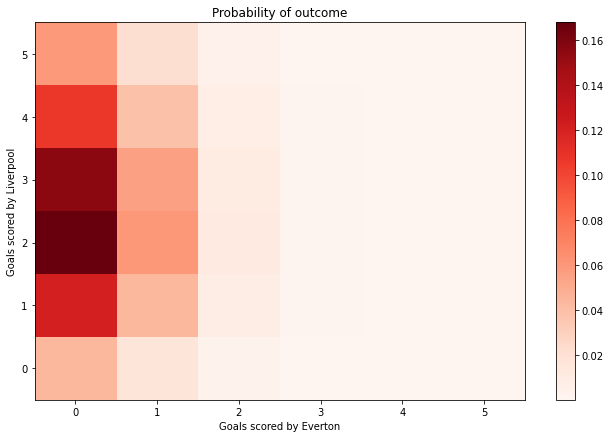

In [30]:
fig=plt.figure(figsize=(9,6))
ax=fig.add_subplot(1,1,1)
pos=ax.imshow(score_matrix, aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Probability of outcome')
plt.xlim((-0.5,5.5))
plt.ylim((-0.5,5.5))
plt.tight_layout()
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)
plt.show()

Calcular, a partir de la matriz, la probabilidad de que haya >2.5 goles

In [31]:
print('Resultado más Probable: {} - {}'.format(np.argmax(score_matrix, axis=0)[0],
                                                np.argmax(score_matrix, axis=1)[0]
                                              ))

Resultado más Probable: 2 - 0


In [32]:
print('Resultado más Improbable: {} - {}'.format(np.argmin(score_matrix, axis=0)[0],
                                                np.argmin(score_matrix, axis=1)[0]
                                              ))

Resultado más Improbable: 0 - 5


In [33]:
lim_goles = 3
# Dos formas
#1
p = 0
for i in range(score_matrix.shape[0]):
    for j in range(score_matrix.shape[1]):
        if i+j<3:
            p+=score_matrix[i][j]
#2
p = np.sum([score_matrix[i][j] for i in range(score_matrix.shape[0]) for j in range(score_matrix.shape[1]) if i+j<lim_goles])


print("{} - {}".format(home_team,away_team))
print('Probabilidad <2.5 goles: {:.2%}'.format(p))
print('Probabilidad >2.5 goles: {:.2%}'.format(1-p))

Liverpool - Everton
Probabilidad <2.5 goles: 39.52%
Probabilidad >2.5 goles: 60.48%
